In [127]:
from __future__ import division

import json
import pickle
import pandas as pd
import numpy as np
import math
from scipy.ndimage.interpolation import shift
from matplotlib import style
import matplotlib.pyplot as plt



style.use('ggplot')

Function for calculating mean of players x,y positions on the pitch

In [128]:
def caluclate_avrg_pos(minutes_step, pos_mean, player, pos_count, activity_count):
    count = 0 
    for minutes in range(0,minutes_step):
        pos_mean[player][0] += pos_count[player][0][minutes]
        pos_mean[player][1] += pos_count[player][1][minutes]
        count += activity_count[player][minutes] 
    if count!=0:
        pos_mean[player][0] /= count
        pos_mean[player][1] /= count
    else:
        pos_mean[player][0] = 0 
        pos_mean[player][1] = 0

Functions for calculating first 10 min of mean of position data of each player. By that way we'll be able to seperately calculate each halp mean pos data. 

In [129]:
def fist_time_step_mean_data(half, data_persec):
    
    for t in data_persec:
        
        i = int(t['minute'])*60 + int(t['second'])
        x_pos = t['xpos']
        y_pos = t['ypos']
        team_id_t = int(t['teamId'])
        jersey_number_t = int(t['jerseyNumber'])
        has_ball_teamId_t = int(t['hasballTeamId'])
        math_half = int(t['half'])
       
        
        sec = i-(half-1)*45*60
        
        
        if sec==threshold_second+1:
            break
        
        if math_half == half:
            time_step = math.floor(sec/60)

            if team_id_t == home_team_id:

                if player_positionId['homeTeam'][jersey_number_t] == 1 and has_ball_teamId_t != 0:
                    home_pos_count_minutes[home_dict[str(jersey_number_t)]][0][time_step] += x_pos
                    home_pos_count_minutes[home_dict[str(jersey_number_t)]][1][time_step] += y_pos
                    home_activity_count_minutes[home_dict[str(jersey_number_t)]][time_step] +=1 

                elif has_ball_teamId_t == away_team_id:
                    home_pos_count_minutes[home_dict[str(jersey_number_t)]][0][time_step] += x_pos
                    home_pos_count_minutes[home_dict[str(jersey_number_t)]][1][time_step] += y_pos
                    home_activity_count_minutes[home_dict[str(jersey_number_t)]][time_step] +=1

            elif team_id_t == away_team_id:
                if player_positionId['awayTeam'][jersey_number_t] == 1 and has_ball_teamId_t != 0:
                    away_pos_count_minutes[away_dict[str(jersey_number_t)]][0][time_step] += x_pos
                    away_pos_count_minutes[away_dict[str(jersey_number_t)]][1][time_step] += y_pos
                    away_activity_count_minutes[away_dict[str(jersey_number_t)]][time_step] +=1 

                elif has_ball_teamId_t == home_team_id:
                    away_pos_count_minutes[away_dict[str(jersey_number_t)]][0][time_step] += x_pos
                    away_pos_count_minutes[away_dict[str(jersey_number_t)]][1][time_step] += y_pos
                    away_activity_count_minutes[away_dict[str(jersey_number_t)]][time_step] +=1

        
    for player_home in range(0, len(home_team_player)):
        caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                       home_activity_count_minutes)
            
    for player_away in range(0, len(away_team_player)):
        caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                       away_activity_count_minutes)
    
            
    
    
    # clear home team
    home_pos_count[0: len(home_team_player)] = 0
    home_activity_count[0: len(home_team_player)] = 0 
    home_activity_count_all[0: len(home_team_player)] = 0
    home_act_nozero = [0,0]


    # clear away team
    away_pos_count[0: len(away_team_player)] = 0
    away_activity_count[0: len(away_team_player)] = 0
    away_activity_count_all[0: len(away_team_player)] = 0
    away_act_nozero = [0,0]



{'1': 0, '2': 1, '5': 2, '6': 3, '7': 4, '8': 5, '9': 6, '10': 7, '11': 8, '13': 9, '14': 10, '15': 11, '17': 12, '18': 13, '20': 14, '23': 15, '29': 16, '32': 17, '70': 18, '88': 19, '94': 20}
[[   0.    0.    0.  100.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.  100.    0.]
 [   0.    0.    0.  100.    0.]
 [   0.    0.    0.   87.    0.]
 [   0.    0.    0.  100.    0.]
 [   0.    0.    0.    9.    0.]
 [   0.    0.    0.   79.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.  100.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.   22.    0.]
 [   0.    0.    0.   13.    0.]
 [   0.    0.    0.   92.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.  100.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.  100.    0.]
 [   0.    0.    0.  100.    0.]]
half:1	min: 15.0


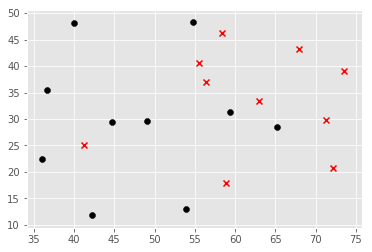



half:1	min: 16.0


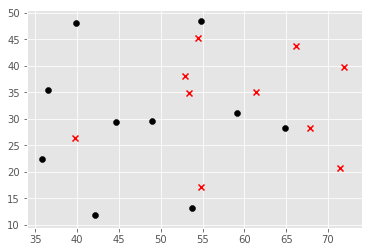



half:1	min: 17.0


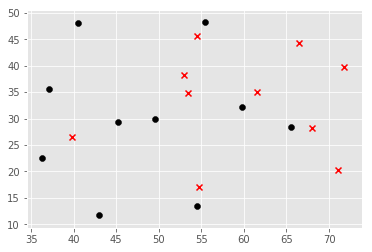



half:1	min: 18.0


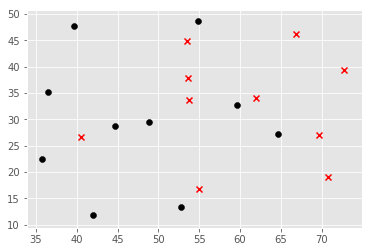



half:1	min: 19.0


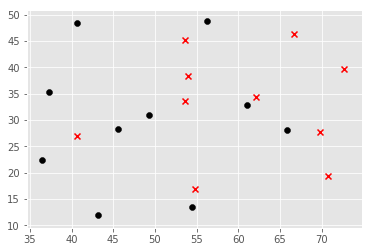



half:1	min: 20.0


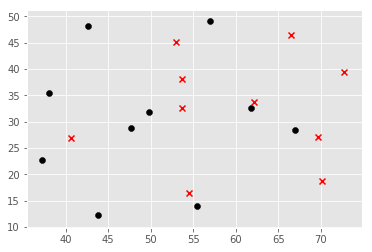



half:1	min: 21.0


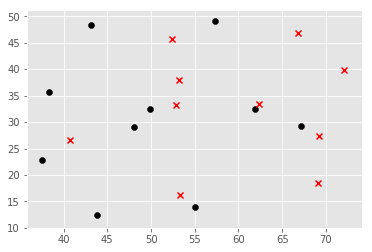



half:1	min: 22.0


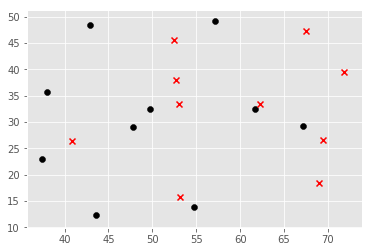



half:1	min: 23.0


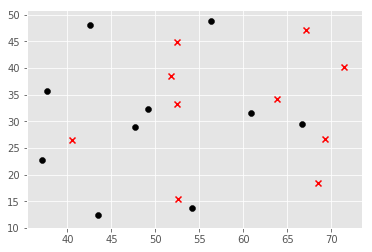



half:1	min: 24.0


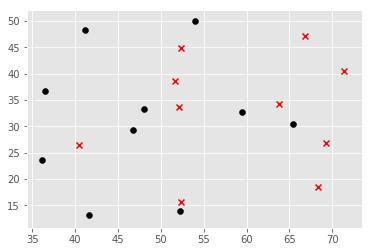



half:1	min: 25.0


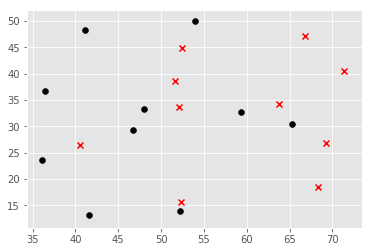



half:1	min: 26.0


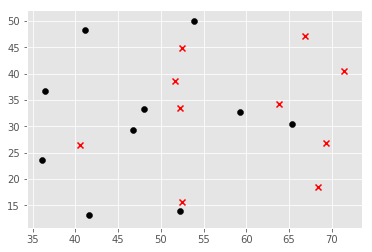



half:1	min: 27.0


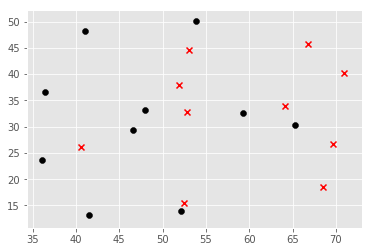



half:1	min: 28.0


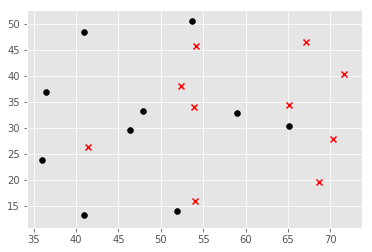



half:1	min: 29.0


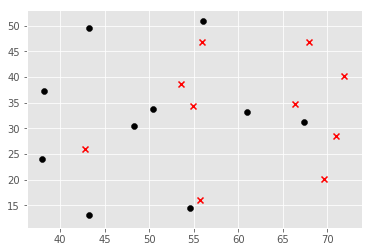



half:1	min: 30.0


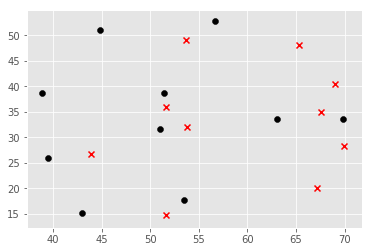



half:1	min: 31.0


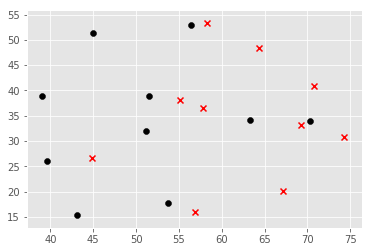



half:1	min: 32.0


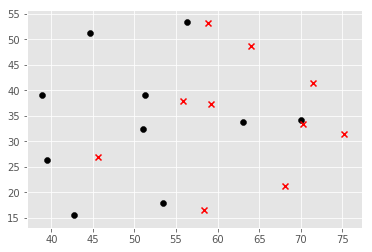



half:1	min: 33.0


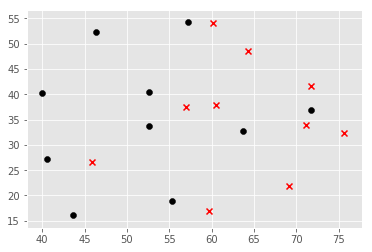



half:1	min: 34.0


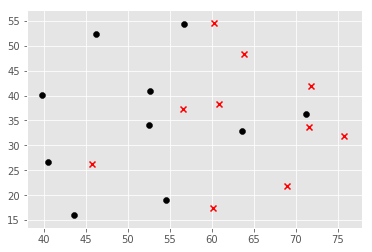



half:1	min: 35.0


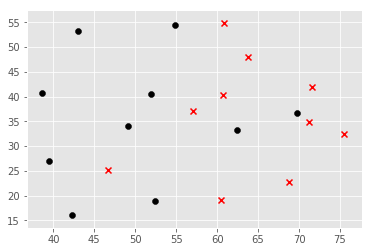



half:1	min: 36.0


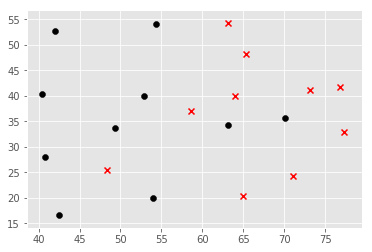



half:1	min: 37.0


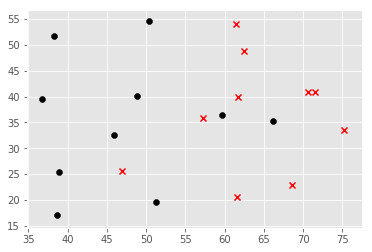



half:1	min: 38.0


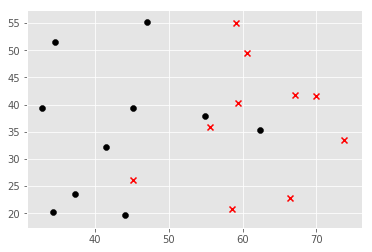



half:1	min: 39.0


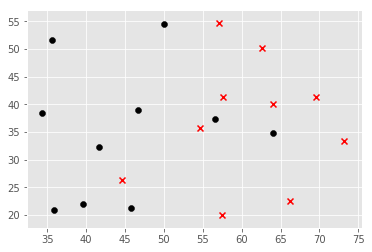



half:1	min: 40.0


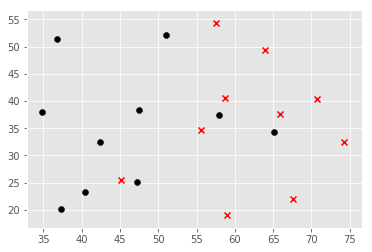



half:1	min: 41.0


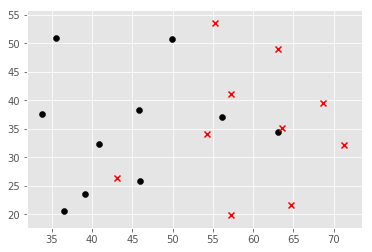



half:1	min: 42.0


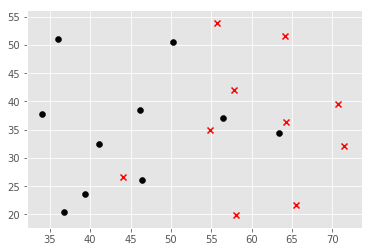



half:1	min: 43.0


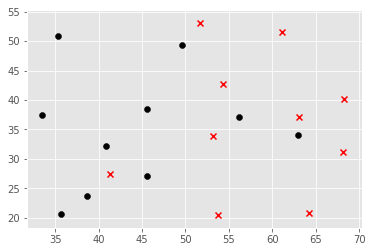



half:1	min: 44.0


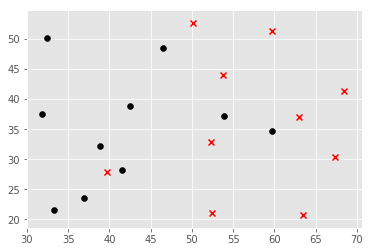



half:1	min: 45.0


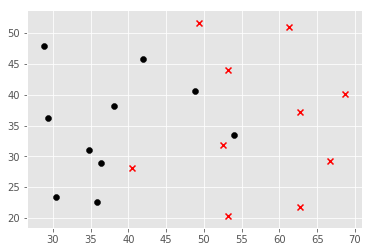



half:1	min: 46.0


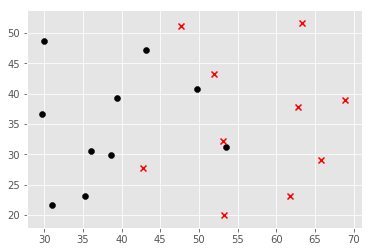



half:1	min: 47.0


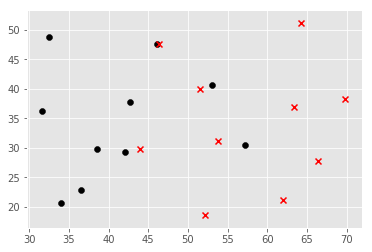



half:1	min: 48.0


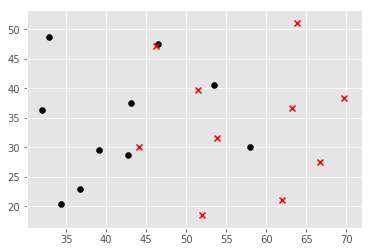



half:1	min: 49.0


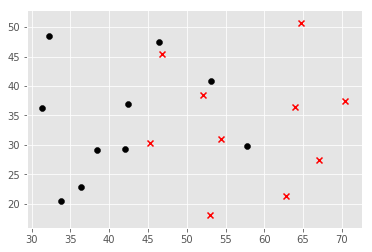



half:2	min: 60.0


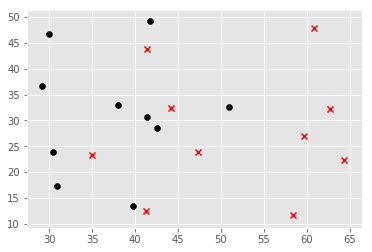



half:2	min: 61.0


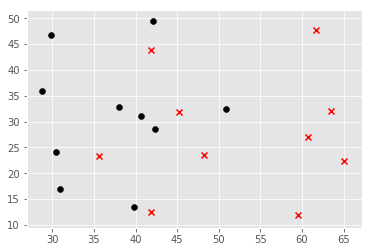



half:2	min: 62.0


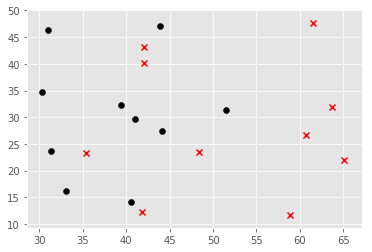



half:2	min: 63.0


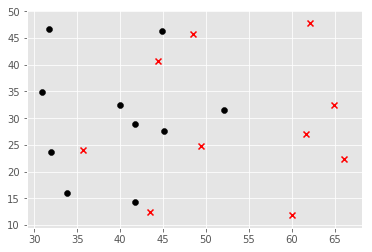



half:2	min: 64.0


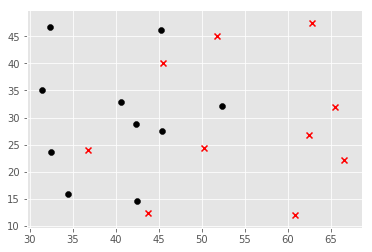



half:2	min: 65.0


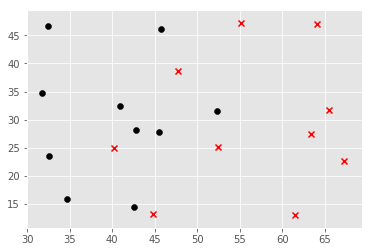



half:2	min: 66.0


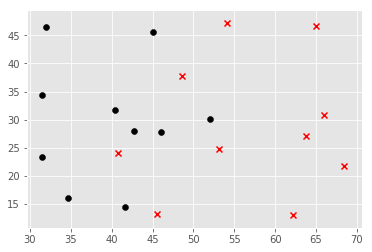



half:2	min: 67.0


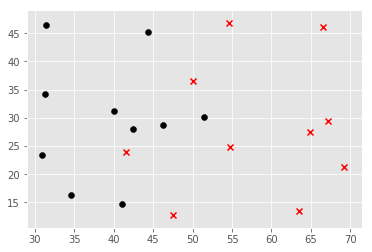



half:2	min: 68.0


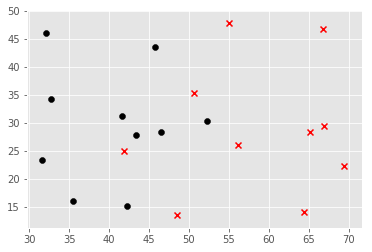



half:2	min: 69.0


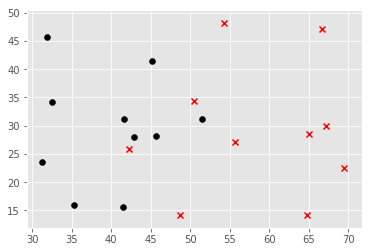



half:2	min: 70.0


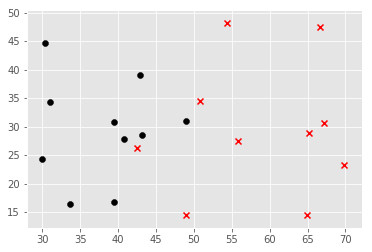



half:2	min: 71.0


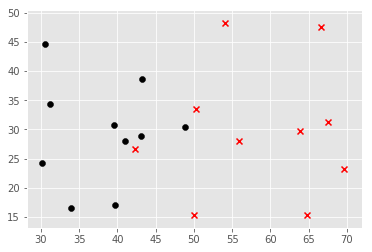



half:2	min: 72.0


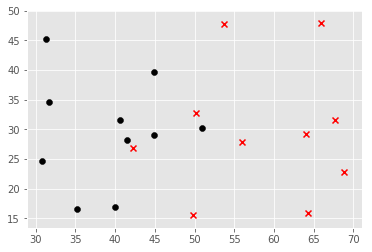



half:2	min: 73.0


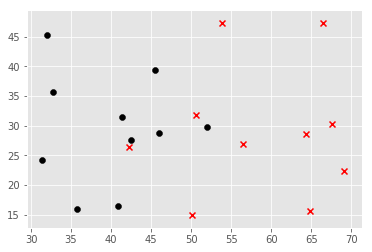



half:2	min: 74.0


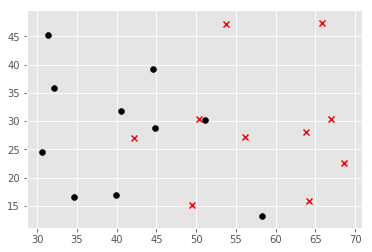



half:2	min: 75.0


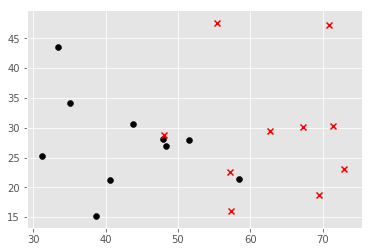



half:2	min: 76.0


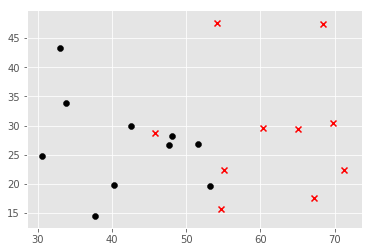



half:2	min: 77.0


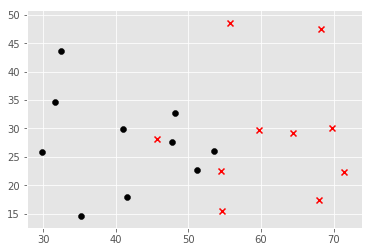



half:2	min: 78.0


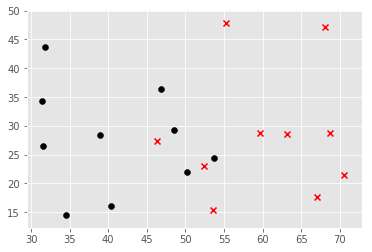



half:2	min: 79.0


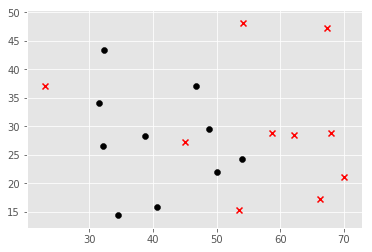



half:2	min: 80.0


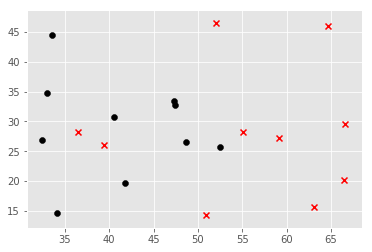



half:2	min: 81.0


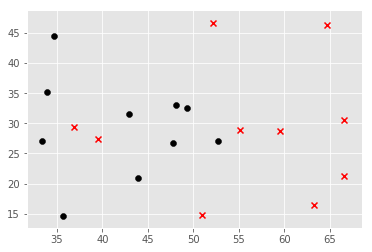



half:2	min: 82.0


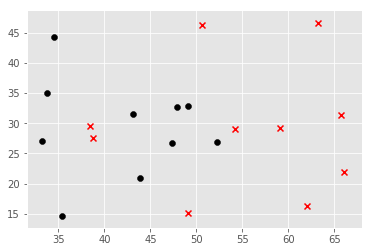



half:2	min: 83.0


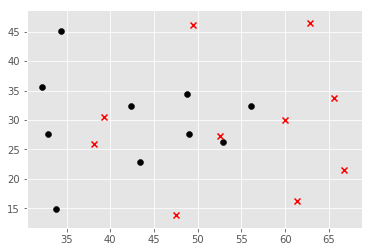



half:2	min: 84.0


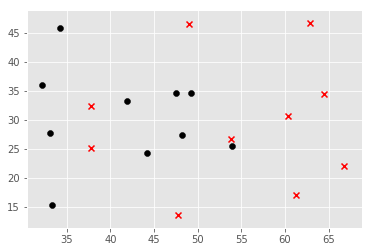



half:2	min: 85.0


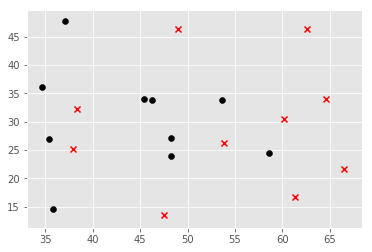



half:2	min: 86.0


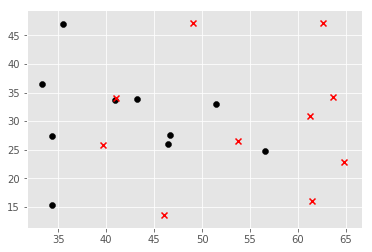



half:2	min: 87.0


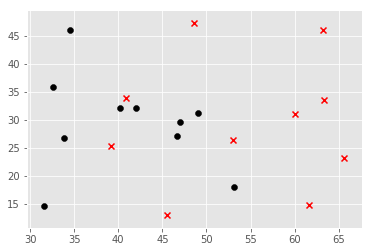



half:2	min: 88.0


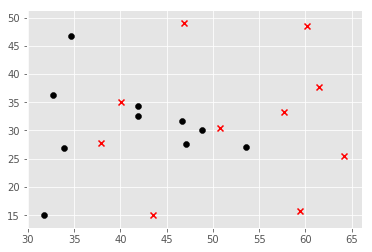



half:2	min: 89.0


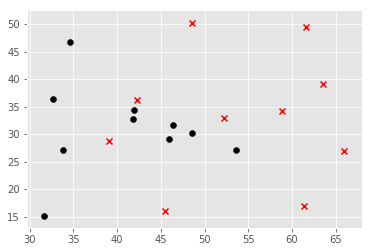



half:2	min: 90.0


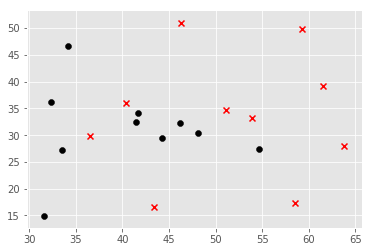



half:2	min: 91.0


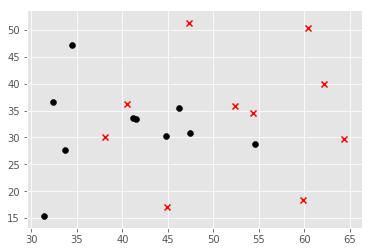



half:2	min: 92.0


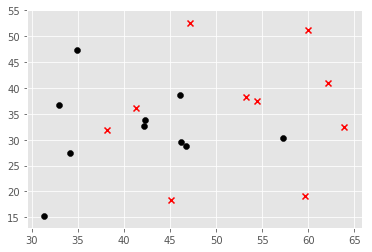



half:2	min: 93.0


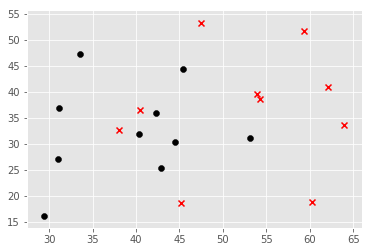



half:2	min: 94.0


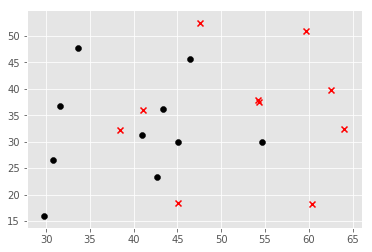

In [133]:
with open('../data/general/matches_2017_2018_v1.json') as matches_json:
    matches_json = pd.read_json(matches_json)
    
matches = [60565]

minutes_step = 15
threshold_second = 899
data_height = 6000 # number of seconds in per match
data_width = 128 # number of features for fector


for id in matches:
    with open('../data/match_' + str(id) + '/match_data_' + str(id) + '.json', 'r') as file:
        team = json.load(file)
      
        
    # defining 3 distinct id in game
    referee_id = 0
    home_team_id = int(team[1]['teamId'])
    away_team_id = int(team[2]['teamId'])
    
    # home player list
    home_team_player = []
    away_team_player = []
    
    # player dicts
    home_dict = {} 
    away_dict = {} 
    
    # players position ID 
    player_positionId = {'homeTeam' : {}, 'awayTeam' : {}}
    
    
    with open('../data/match_' + str(id) + '/roster_data_' + str(id) + '.json', 'r') as file:
        match_squad = json.load(file)
        
    for roaster in match_squad:
        if roaster['teamId'] == home_team_id:
            home_team_player.append(str(roaster['jerseyNumber']))
            player_positionId['homeTeam'][roaster['jerseyNumber']] = roaster['positionId'] 
            
        elif roaster['teamId'] == away_team_id:
            away_team_player.append(str(roaster['jerseyNumber']))
            player_positionId['awayTeam'][roaster['jerseyNumber']] = roaster['positionId']
            
            
    
    home_team_player.sort(key=int)
    home_val = np.arange(0, len(home_team_player))
    home_dict = dict(zip(home_team_player, home_val))
    home_dict_reverse = dict(zip(home_val, home_team_player))

    away_team_player.sort(key=int)
    away_val = np.arange(0, len(away_team_player))
    away_dict = dict(zip(away_team_player, away_val))
    away_dict_reverse = dict(zip(away_val, away_team_player))
    
    
    
    # home and away team players' status[0: not playing, 1: playing, 2-left the game], enter status[0: enter 1st half, 1: enter second half],
    # enter time, and duration, red card
    home_dur_in_out = np.zeros(shape=(len(home_team_player), 5), dtype=np.float)
    away_dur_in_out = np.zeros(shape=(len(away_team_player), 5), dtype=np.float)
    
    
    with open('../data/match_' + str(id) + '/players_data_' + str(id) + '.json', 'r') as file:
        player_data = json.load(file)
        
        
    for player in player_data:
        jersey_number = player['jerseyNumber']
        if player['teamId'] == home_team_id:
            home_dur_in_out[home_dict[str(jersey_number)]][3] = player['duration']
            home_dur_in_out[home_dict[str(jersey_number)]][4] = player['redCard']
         
            
            
        elif player['teamId'] == away_team_id:
            away_dur_in_out[away_dict[str(jersey_number)]][3] = player['duration']
            away_dur_in_out[away_dict[str(jersey_number)]][3] = player['redCard']
            

    
    # home and away team player pos and activity count: 0-xpos, 1-ypos
    home_pos_count = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
    home_activity_count = np.zeros(shape=(len(home_team_player), 1), dtype=np.int)
    home_activity_count_all = np.zeros(shape=(len(home_team_player), 2), dtype=np.int)
    home_act_nozero = [0,0] # number non-zero activity_count_all
    home_count_shift = np.zeros(shape=(len(home_team_player), 1), dtype=np.int)
    
    away_pos_count = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
    away_activity_count = np.zeros(shape=(len(away_team_player), 1), dtype=np.int)
    away_activity_count_all = np.zeros(shape=(len(away_team_player), 2), dtype=np.int)
    away_act_nozero = [0,0] # number non-zero activity_count_all
    away_count_shift = np.zeros(shape=(len(away_team_player), 1), dtype=np.int)

    # home and away team player count data for 10 min: 0-xpos, 1-ypos / 0-1min, 1-2min... 9-10min 
    home_pos_count_minutes = np.zeros(shape=(len(home_team_player), 2, minutes_step), dtype=np.float)
    home_activity_count_minutes = np.zeros(shape=(len(home_team_player), minutes_step), dtype=np.int)

    away_pos_count_minutes = np.zeros(shape=(len(away_team_player), 2, minutes_step), dtype=np.float)
    away_activity_count_minutes = np.zeros(shape=(len(away_team_player), minutes_step), dtype=np.int)


    # home and away team Mean pos data: 0-xpos, 1-ypos
    home_pos_mean = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)

    away_pos_mean = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
    
    
    
   
    
         
    # create array of x input data for every match
    x_intput = np.ndarray(shape=(data_height, data_width), dtype=np.float)
    
    
            
    with open('../data/match_' + str(id) + '/per_sec_data_' + str(id) + '.json', 'r') as file:
        data_persec = json.load(file)

        
    # create first average positon data for assigning player position at the 1st half
    fist_time_step_mean_data(1, data_persec)
    

    # temporary t        
    tmp_t = 0
    
    # 1st half duration
    first_half_duration = 0
    
    # temporary half
    tmp_half = 1
        
    for d in data_persec:
        
        match_half_t = int(d['half'])
        
        # create first average positon data for assigning player at the 2nd half
        if match_half_t != tmp_half:
            tmp_half = match_half_t
            
            # clear home team data
            home_pos_count[0: len(home_team_player)] = 0
            home_activity_count[0: len(home_team_player)] = 0 
            home_activity_count_all[0: len(home_team_player)] = 0
            home_act_nozero = [0,0]
            home_count_shift[0: len(home_team_player)] = 1
            home_pos_count_minutes[0: len(home_team_player)] = 0
            home_activity_count_minutes[0: len(home_team_player)] = 0
            home_pos_mean[0: len(home_team_player)] = 0

            # clear away team data
            away_pos_count[0: len(away_team_player)] = 0
            away_activity_count[0: len(away_team_player)] = 0 
            away_activity_count_all[0: len(away_team_player)] = 0
            away_act_nozero = [0,0]
            away_count_shift[0: len(away_team_player)] = 1
            away_pos_count_minutes[0: len(away_team_player)] = 0
            away_activity_count_minutes[0: len(away_team_player)] = 0
            away_pos_mean[0: len(away_team_player)] = 0
            
            fist_time_step_mean_data(2, data_persec)
        
        
        i = int(d['minute'])*60 + int(d['second'])
        x_pos = d['xpos']
        y_pos = d['ypos']
        team_id_t = int(d['teamId'])
        jersey_number_t = int(d['jerseyNumber'])
        has_ball_teamId_t = int(d['hasballTeamId'])
        
        
        
        
        # find out how long did 1st half last
        if match_half_t == 1:
            first_half_duration = i
            
            

        if (i+1)%60==0:
            
            if team_id_t == home_team_id:
                player = home_dict[str(jersey_number_t)]
                home_activity_count_all[player][1] = 1
                 
            elif team_id_t == away_team_id:
                player = away_dict[str(jersey_number_t)]
                away_activity_count_all[player][1] = 1
            
                
                    
                    
        if i%60!=0 or i==0 or (i==45*60 and match_half_t==2):    
        
            if team_id_t == home_team_id:

                if home_dur_in_out[home_dict[str(jersey_number_t)]][0] == 0:
                    home_dur_in_out[home_dict[str(jersey_number_t)]][0] = 1 # 1 means player is in game 
                    home_dur_in_out[home_dict[str(jersey_number_t)]][1] = match_half_t # enter half
                    home_dur_in_out[home_dict[str(jersey_number_t)]][2] = i  # enter time

                if player_positionId['homeTeam'][jersey_number_t] == 1 and has_ball_teamId_t != 0:
                    home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                    home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                    home_activity_count[home_dict[str(jersey_number_t)]] +=1
                    
                elif i<((home_dur_in_out[home_dict[str(jersey_number_t)]][2])+60):
                    if x_pos!=0 and y_pos !=0:  
                        home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                        home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                        home_activity_count[home_dict[str(jersey_number_t)]] +=1 

                elif has_ball_teamId_t == away_team_id:
                    if x_pos!=0 and y_pos !=0:  
                        home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                        home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                        home_activity_count[home_dict[str(jersey_number_t)]] +=1 

            elif team_id_t == away_team_id:

                if away_dur_in_out[away_dict[str(jersey_number_t)]][0] == 0:
                    away_dur_in_out[away_dict[str(jersey_number_t)]][0] = 1
                    away_dur_in_out[away_dict[str(jersey_number_t)]][1] = match_half_t
                    away_dur_in_out[away_dict[str(jersey_number_t)]][2] = i


                if player_positionId['awayTeam'][jersey_number_t] == 1 and has_ball_teamId_t != 0:
                    away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                    away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                    away_activity_count[away_dict[str(jersey_number_t)]] +=1
                    
                elif i<((away_dur_in_out[away_dict[str(jersey_number_t)]][2])+60):
                    if x_pos!=0 and y_pos!=0:
                        away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                        away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                        away_activity_count[away_dict[str(jersey_number_t)]] +=1 

                elif has_ball_teamId_t == home_team_id:
                    if x_pos!=0 and y_pos!=0:
                        away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                        away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                        away_activity_count[away_dict[str(jersey_number_t)]] +=1 

            elif team_id_t == referee_id:
                pass
                # referee_pos_t['xpos']
                # referee_pos_t['ypos']
        
        
        

        
        # shifing last index of 10min arry (period of 10min) with last min data
        # and calculate mena position of each player each min based on previus 10 min
        if i%60 == 0 and tmp_t != i+1 and (i-(match_half_t-1)*45*60)>threshold_second:
            
            for player_home in range(0, len(home_team_player)):
                home_pos_count_minutes[player_home][0] = (shift(home_pos_count_minutes[player_home][0], -1, cval=0))
                home_pos_count_minutes[player_home][1] = (shift(home_pos_count_minutes[player_home][1], -1, cval=0))
                home_activity_count_minutes[player_home] = (shift(home_activity_count_minutes[player_home], -1, cval=0))

                home_pos_count_minutes[player_home][0][minutes_step-1] = home_pos_count[player_home][0]
                home_pos_count_minutes[player_home][1][minutes_step-1] = home_pos_count[player_home][1]
                home_activity_count_minutes[player_home][minutes_step-1] = home_activity_count[player_home]
                
                

            for player_away in range(0, len(away_team_player)):
                away_pos_count_minutes[player_away][0] = (shift(away_pos_count_minutes[player_away][0], -1, cval=0))
                away_pos_count_minutes[player_away][1] = (shift(away_pos_count_minutes[player_away][1], -1, cval=0))
                away_activity_count_minutes[player_away] = (shift(away_activity_count_minutes[player_away], -1, cval=0))

                away_pos_count_minutes[player_away][0][minutes_step-1] = away_pos_count[player_away][0]
                away_pos_count_minutes[player_away][1][minutes_step-1] = away_pos_count[player_away][1]
                away_activity_count_minutes[player_away][minutes_step-1] = away_activity_count[player_away]
            
            
            tmp_t = i+1

            home_pos_mean[0:len(home_team_player)] = 0
            home_act_nozero = [0,0]
            
            away_pos_mean[0:len(away_team_player)] = 0
            away_act_nozero = [0,0]
            
            
            
            for player_home in range(0, len(home_team_player)):
                
                if (home_activity_count_all[player_home][0]!=0):
                    home_act_nozero[0] += 1
                    
                if (home_activity_count_all[player_home][1]!=0):
                    home_act_nozero[1] += 1
                    
                    
             
            
            for player_away in range(0, len(away_team_player)):
                
                if (away_activity_count_all[player_away][0]!=0):
                    away_act_nozero[0] += 1
                
                if (away_activity_count_all[player_away][1]!=0):
                    away_act_nozero[1] += 1
                
                

            
            for player_home in range(0, len(home_team_player)):
                home_count_shift[player_home] = 1
                
                if home_activity_count_all[player_home][1] != 0:
                    
                    caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                       home_activity_count_minutes)
                   
                    
                elif home_activity_count_all[player_home][1] == 0 and home_dur_in_out[player_home][0]==1 and home_dur_in_out[player_home][4]==1: 
    
                    # player current and whole game duration durng match
                    enter_half = home_dur_in_out[player_home][1]
                    enter_time = home_dur_in_out[player_home][2]
                    p_game_play_dur = home_dur_in_out[player_home][3]

                    h = match_half_t
                    f_h_d= first_half_duration
                    
                    if enter_half == 1:
                        current_play_dur = math.floor( ((f_h_d - enter_time) + (i-45*60)*(h-1) )/60 )
                    elif enter_half == 2:
                        current_play_dur = math.floor( (i - enter_time)/60 )

                    if current_play_dur < p_game_play_dur:
                        caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                       home_activity_count_minutes)
                    else:
                         home_dur_in_out[player_home][0]==2
                        
                        
                        
                elif home_activity_count_all[player_home][1] == 0 and home_dur_in_out[player_home][0]==1:
                    
                    if (home_act_nozero[0] == home_act_nozero[1]):
                        home_dur_in_out[player_home][0]=2
                    else:
                        caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                       home_activity_count_minutes)
                        home_count_shift[player_home] = 0
       
                else:
                    home_pos_mean[player_home][0] = 0 
                    home_pos_mean[player_home][1] = 0
                    

                home_activity_count_all[player_home] = (shift(home_activity_count_all[player_home], -1, cval=0))
                if home_count_shift[player_home] == 0:
                    home_activity_count_all[player_home][0] = 1
                    
                    
                jersey_n = home_dict_reverse[player_home]
                if player_positionId['homeTeam'][int(jersey_n)] == 1:
                    pass
                elif home_pos_mean[player_home][0]!=0 and home_pos_mean[player_home][1]!=0:
                    plt.scatter(home_pos_mean[player_home][0], home_pos_mean[player_home][1], marker="o", color="k", linewidths=0.5)
                    
            
        
            for player_away in range(0, len(away_team_player)):
                away_count_shift[player_away] = 1
                
                
                    
                if away_activity_count_all[player_away][1] != 0:
                    caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                       away_activity_count_minutes)
                    
                elif away_activity_count_all[player_away][1] == 0 and away_dur_in_out[player_away][0]==1 and away_dur_in_out[player_away][4]==1:

                    
                    # player current and whole game duration durng match
                    enter_half = away_dur_in_out[player_away][1]
                    enter_time = away_dur_in_out[player_away][2]
                    p_game_play_dur = away_dur_in_out[player_away][3]

                    h = match_half_t
                    f_h_d= first_half_duration
                    
                    if enter_half == 1:
                        current_play_dur = math.floor( ((f_h_d - enter_time) + (i-45*60)*(h-1) )/60 )
                    elif enter_half == 2:
                        current_play_dur = math.floor( (i - enter_time)/60 )

                    if current_play_dur < p_game_play_dur:
                        caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                       away_activity_count_minutes)
                        away_dur_in_out[player_away][0]==2
                    else:
                        away_dur_in_out[player_home][0]==2
                        
                
                elif away_activity_count_all[player_away][1] == 0 and away_dur_in_out[player_away][0]==1:
                    
                    if (away_act_nozero[0] == away_act_nozero[1]):
                        away_dur_in_out[player_away][0]=2
                    else:
                        caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                       away_activity_count_minutes)
                        away_count_shift[player_away] = 0
                        
       
                else:
                    away_pos_mean[player_away][0] = 0 
                    away_pos_mean[player_away][1] = 0
                
                away_activity_count_all[player_away] = (shift(away_activity_count_all[player_away], -1, cval=0))
                if away_count_shift[player_away] == 0:
                    away_activity_count_all[player_away][0] = 1
                    
                

                    
                    
                jersey_n = away_dict_reverse[player_away]
                if player_positionId['awayTeam'][int(jersey_n)] == 1:
                    pass
                elif away_pos_mean[player_away][0]!=0 and away_pos_mean[player_away][1]!=0:
                    plt.scatter(away_pos_mean[player_away][0], away_pos_mean[player_away][1], marker="x", color="r", linewidths=0.5)
                   
                    

            print("half:" + str(match_half_t) +"\tmin: " + str((i)/60))
            plt.show()
            print('\n')        
            
            
            
                
            

            # clear home team
            home_pos_count[0: len(home_team_player)] = 0
            home_activity_count[0: len(home_team_player)] = 0
           


            # clear away team
            away_pos_count[0: len(away_team_player)] = 0
            away_activity_count[0: len(away_team_player)] = 0
         
            

        
        
        

If one player's number of appearances during one minute is equal to zero, it implies that the player is out of the pitch (substituted, waiting for substitution, or receiving medical treatment). So we set his pos_mean (average coordinated per minute) to zero. But we keep his pos_10mins/ball_count_10mins data vector unchanged with just shifting 1 element to left and updating its last element. Applying this we do not lose mean of 10min position arry (10, 1 min for each) if it comes back to pitch again.